# AD Model Inference

## Create Project

In [146]:
#pip install mlrun==1.0.2

In [147]:
#pip install plotly

In [148]:
import mlrun

In [150]:
# Set the project name:
project_name = "inference-test"

# Create the project:
project = mlrun.get_or_create_project(name=project_name, context="./")

> 2022-06-20 17:28:08,690 [info] created and saved project inference-test


In [151]:
framework = "tf-keras"

In [152]:
no_of_models=2

## Train the model

In [153]:
# mlrun:start-code

In [154]:
# mlrun:end-code

In [169]:
train_ad_model = mlrun.code_to_function(
    name="train_model",
    kind="job", 
    filename='training.py',
    image="mlrun/ml-models",
    project=project.name
)
train_model.apply(mlrun.platforms.auto_mount())

In [170]:
train_model.export("train_ad_model.yaml")

> 2022-06-20 17:38:54,698 [info] function spec saved to path: train_ad_model.yaml


In [174]:
project.set_function("train_ad_model.yaml", name="train_ad_model")
project.save()

In [156]:
import json
import uuid
runs=[]

instanceId=str(uuid.uuid1())

# for x in range(no_of_models):
train_model_run = train_model.run(name='train_model',
                                      project=project.name,
                                       handler='train_ad_model',
                                        params={'insightpak_name': 'ad_model','instance_id':instanceId}
                                 ,local=True)
    
#     print("run id :",train_model_run.uid())
#     runs.append(train_model_run)

> 2022-06-20 17:28:31,094 [info] starting run train_model uid=ea546e0bd8874ff191815c66c8d43b83 DB=http://mlrun-api:8080
Epoch 1/2
4/4 [==============================] - 0s 20ms/step - loss: 1.2193 - accuracy: 0.3644
Epoch 2/2
4/4 [==============================] - 0s 2ms/step - loss: 1.2106 - accuracy: 0.2542
INFO:tensorflow:Assets written to: ./model/ad_model/assets


> 2022-06-20 17:28:32,689 [info] run executed, status=completed


In [157]:
# # print(runs[0].uid())
# from mlrun import get_run_db
# db = get_run_db()
# db.watch_log(uid='df374ae3596f452ea5796eb2d84f268f', project=project.name)

In [158]:
models=train_model_run.outputs
print(models)

{'ad_model_676766fa-f0be-11ec-af21-15bc7adf6b76': 'store://artifacts/inference-test/train_model_ad_model_676766fa-f0be-11ec-af21-15bc7adf6b76:ea546e0bd8874ff191815c66c8d43b83', 'ad_model_state_676766fa-f0be-11ec-af21-15bc7adf6b76': 'store://artifacts/inference-test/train_model_ad_model_state_676766fa-f0be-11ec-af21-15bc7adf6b76:ea546e0bd8874ff191815c66c8d43b83'}


## Create Serving Function

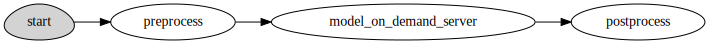

In [159]:
# Create the function:
serving_function = mlrun.code_to_function(
    name="model-on-demand-serving", 
    kind="serving", 
    filename='serving.py',
    image="mlrun/mlrun",
)

# Set the topology and get the graph object:
graph = serving_function.set_topology("flow", engine="async")

# Build the serving graph:
graph.to(handler="preprocess", name="preprocess")\
     .to(class_name="ModelOnDemandServer", name="model_on_demand_server")\
     .to(handler="postprocess", name="postprocess").respond()

# Plot to graph:
graph.plot(rankdir='LR')

In [175]:
serving_function.export("serving_ad_model.yaml")

> 2022-06-20 17:43:30,203 [info] function spec saved to path: serving_ad_model.yaml


In [176]:
project.set_function("serving_ad_model.yaml", name="serving_ad_model")
project.save()

In [178]:
project.export('./ad_model_project.zip')

## Test Via Mock Server

In [160]:
# Create our server:
server = serving_function.to_mock_server()

In [161]:
# Setup the events:
tests = 5  # Amount of events to test
events =[{'models':models,'instanceId':instanceId,'inputs': {"A": {"data": [{"ts": 1577836800.0, "val": 61.0}, {"ts": 1577837100.0, "val": 16.0}, {"ts": 1577837400.0, "val": 12.0}, {"ts": 1577837700.0, "val": 26.0}, {"ts": 1577838000.0, "val": 47.0}, {"ts": 1577838300.0, "val": 54.0}, {"ts": 1577838600.0, "val": 18.0}, {"ts": 1577838900.0, "val": 87.0}, {"ts": 1577839200.0, "val": 93.0}, {"ts": 1577839800.0, "val": 72.0}, {"ts": 1577840100.0, "val": 73.0}, {"ts": 1577840400.0, "val": 54.0}, {"ts": 1577840700.0, "val": 64.0}, {"ts": 1577841000.0, "val": 17.0}, {"ts": 1577841600.0, "val": 2.0}, {"ts": 1577841900.0, "val": 41.0}, {"ts": 1577842200.0, "val": 82.0}, {"ts": 1577842800.0, "val": 99.0}, {"ts": 1577843100.0, "val": 56.0}, {"ts": 1577843400.0, "val": 8.0}, {"ts": 1577843700.0, "val": 49.0}, {"ts": 1577844000.0, "val": 83.0}, {"ts": 1577844300.0, "val": 58.0}, {"ts": 1577844900.0, "val": 23.0}, {"ts": 1577845500.0, "val": 97.0}, {"ts": 1577845800.0, "val": 3.0}, {"ts": 1577846100.0, "val": 39.0}, {"ts": 1577846400.0, "val": 6.0}, {"ts": 1577846700.0, "val": 4.0}, {"ts": 1577847000.0, "val": 42.0}, {"ts": 1577847300.0, "val": 46.0}, {"ts": 1577847600.0, "val": 44.0}, {"ts": 1577848200.0, "val": 67.0}, {"ts": 1577848500.0, "val": 67.0}, {"ts": 1577848800.0, "val": 87.0}, {"ts": 1577849100.0, "val": 61.0}, {"ts": 1577849400.0, "val": 61.0}, {"ts": 1577849700.0, "val": 89.0}, {"ts": 1577850000.0, "val": 28.0}, {"ts": 1577850900.0, "val": 10.0}, {"ts": 1577851200.0, "val": 72.0}, {"ts": 1577851800.0, "val": 35.0}, {"ts": 1577852100.0, "val": 79.0}, {"ts": 1577852400.0, "val": 63.0}, {"ts": 1577852700.0, "val": 57.0}, {"ts": 1577853000.0, "val": 46.0}, {"ts": 1577853300.0, "val": 23.0}, {"ts": 1577853600.0, "val": 21.0}, {"ts": 1577853900.0, "val": 43.0}, {"ts": 1577854200.0, "val": 86.0}, {"ts": 1577854500.0, "val": 33.0}, {"ts": 1577854800.0, "val": 47.0}, {"ts": 1577855100.0, "val": 32.0}, {"ts": 1577855400.0, "val": 57.0}, {"ts": 1577856300.0, "val": 77.0}, {"ts": 1577856900.0, "val": 90.0}, {"ts": 1577857200.0, "val": 86.0}, {"ts": 1577857500.0, "val": 70.0}, {"ts": 1577857800.0, "val": 97.0}, {"ts": 1577858400.0, "val": 23.0}, {"ts": 1577859000.0, "val": 69.0}, {"ts": 1577859300.0, "val": 6.0}, {"ts": 1577859600.0, "val": 70.0}, {"ts": 1577860200.0, "val": 97.0}, {"ts": 1577860500.0, "val": 34.0}, {"ts": 1577860800.0, "val": 95.0}, {"ts": 1577861100.0, "val": 64.0}, {"ts": 1577861400.0, "val": 4.0}, {"ts": 1577861700.0, "val": 71.0}, {"ts": 1577862000.0, "val": 77.0}, {"ts": 1577862600.0, "val": 78.0}, {"ts": 1577862900.0, "val": 43.0}, {"ts": 1577863800.0, "val": 95.0}, {"ts": 1577864100.0, "val": 79.0}, {"ts": 1577864400.0, "val": 63.0}, {"ts": 1577865000.0, "val": 72.0}, {"ts": 1577865300.0, "val": 69.0}, {"ts": 1577865600.0, "val": 16.0}, {"ts": 1577865900.0, "val": 8.0}, {"ts": 1577866500.0, "val": 28.0}, {"ts": 1577866800.0, "val": 93.0}, {"ts": 1577867100.0, "val": 58.0}, {"ts": 1577867400.0, "val": 53.0}, {"ts": 1577868000.0, "val": 96.0}, {"ts": 1577868300.0, "val": 91.0}, {"ts": 1577868600.0, "val": 43.0}, {"ts": 1577868900.0, "val": 69.0}, {"ts": 1577869200.0, "val": 3.0}, {"ts": 1577869800.0, "val": 90.0}, {"ts": 1577870100.0, "val": 50.0}, {"ts": 1577870400.0, "val": 2.0}, {"ts": 1577871300.0, "val": 74.0}, {"ts": 1577871600.0, "val": 41.0}, {"ts": 1577871900.0, "val": 81.0}, {"ts": 1577872200.0, "val": 37.0}, {"ts": 1577872800.0, "val": 79.0}, {"ts": 1577873100.0, "val": 46.0}, {"ts": 1577873400.0, "val": 80.0}, {"ts": 1577873700.0, "val": 30.0}, {"ts": 1577874000.0, "val": 57.0}, {"ts": 1577874300.0, "val": 39.0}, {"ts": 1577874600.0, "val": 6.0}, {"ts": 1577874900.0, "val": 25.0}, {"ts": 1577875500.0, "val": 15.0}, {"ts": 1577876100.0, "val": 66.0}, {"ts": 1577876700.0, "val": 48.0}, {"ts": 1577877000.0, "val": 64.0}, {"ts": 1577877300.0, "val": 24.0}, {"ts": 1577877600.0, "val": 18.0}, {"ts": 1577877900.0, "val": 41.0}, {"ts": 1577878500.0, "val": 5.0}, {"ts": 1577878800.0, "val": 85.0}, {"ts": 1577879100.0, "val": 81.0}, {"ts": 1577879400.0, "val": 4.0}, {"ts": 1577880000.0, "val": 31.0}, {"ts": 1577880300.0, "val": 28.0}, {"ts": 1577880600.0, "val": 30.0}, {"ts": 1577880900.0, "val": 20.0}, {"ts": 1577881200.0, "val": 24.0}, {"ts": 1577881500.0, "val": 35.0}]}, "B": {"data": [{"ts": 1577837100.0, "val": 36.0}, {"ts": 1577837400.0, "val": 5.0}, {"ts": 1577837700.0, "val": 2.0}, {"ts": 1577838000.0, "val": 22.0}, {"ts": 1577838300.0, "val": 83.0}, {"ts": 1577838600.0, "val": 4.0}, {"ts": 1577838900.0, "val": 92.0}, {"ts": 1577839200.0, "val": 6.0}, {"ts": 1577839500.0, "val": 7.0}, {"ts": 1577839800.0, "val": 76.0}, {"ts": 1577840400.0, "val": 6.0}, {"ts": 1577840700.0, "val": 30.0}, {"ts": 1577841000.0, "val": 15.0}, {"ts": 1577841300.0, "val": 21.0}, {"ts": 1577841600.0, "val": 51.0}, {"ts": 1577841900.0, "val": 69.0}, {"ts": 1577842200.0, "val": 19.0}, {"ts": 1577842500.0, "val": 94.0}, {"ts": 1577842800.0, "val": 75.0}, {"ts": 1577843100.0, "val": 93.0}, {"ts": 1577843700.0, "val": 1.0}, {"ts": 1577844000.0, "val": 71.0}, {"ts": 1577844600.0, "val": 77.0}, {"ts": 1577844900.0, "val": 84.0}, {"ts": 1577845200.0, "val": 40.0}, {"ts": 1577845500.0, "val": 51.0}, {"ts": 1577845800.0, "val": 35.0}, {"ts": 1577846100.0, "val": 42.0}, {"ts": 1577846400.0, "val": 59.0}, {"ts": 1577847000.0, "val": 99.0}, {"ts": 1577847600.0, "val": 23.0}, {"ts": 1577847900.0, "val": 59.0}, {"ts": 1577848200.0, "val": 68.0}, {"ts": 1577848500.0, "val": 78.0}, {"ts": 1577849100.0, "val": 43.0}, {"ts": 1577849400.0, "val": 13.0}, {"ts": 1577850000.0, "val": 14.0}, {"ts": 1577850300.0, "val": 32.0}, {"ts": 1577850600.0, "val": 38.0}, {"ts": 1577850900.0, "val": 96.0}, {"ts": 1577851200.0, "val": 75.0}, {"ts": 1577851800.0, "val": 89.0}, {"ts": 1577852100.0, "val": 73.0}, {"ts": 1577852400.0, "val": 12.0}, {"ts": 1577852700.0, "val": 6.0}, {"ts": 1577853000.0, "val": 25.0}, {"ts": 1577853600.0, "val": 13.0}, {"ts": 1577853900.0, "val": 59.0}, {"ts": 1577854800.0, "val": 27.0}, {"ts": 1577855100.0, "val": 30.0}, {"ts": 1577855700.0, "val": 42.0}, {"ts": 1577856000.0, "val": 30.0}, {"ts": 1577856300.0, "val": 28.0}, {"ts": 1577856600.0, "val": 37.0}, {"ts": 1577857800.0, "val": 20.0}, {"ts": 1577858100.0, "val": 82.0}, {"ts": 1577858400.0, "val": 37.0}, {"ts": 1577858700.0, "val": 95.0}, {"ts": 1577859000.0, "val": 27.0}, {"ts": 1577859300.0, "val": 90.0}, {"ts": 1577859600.0, "val": 43.0}, {"ts": 1577859900.0, "val": 11.0}, {"ts": 1577860200.0, "val": 85.0}, {"ts": 1577860500.0, "val": 13.0}, {"ts": 1577861100.0, "val": 72.0}, {"ts": 1577861400.0, "val": 65.0}, {"ts": 1577861700.0, "val": 65.0}, {"ts": 1577862000.0, "val": 27.0}, {"ts": 1577862300.0, "val": 55.0}, {"ts": 1577862600.0, "val": 18.0}, {"ts": 1577863200.0, "val": 32.0}, {"ts": 1577863500.0, "val": 63.0}, {"ts": 1577863800.0, "val": 10.0}, {"ts": 1577864100.0, "val": 20.0}, {"ts": 1577864400.0, "val": 17.0}, {"ts": 1577864700.0, "val": 65.0}, {"ts": 1577865000.0, "val": 21.0}, {"ts": 1577865300.0, "val": 66.0}, {"ts": 1577865600.0, "val": 95.0}, {"ts": 1577865900.0, "val": 37.0}, {"ts": 1577866200.0, "val": 50.0}, {"ts": 1577866500.0, "val": 14.0}, {"ts": 1577867100.0, "val": 1.0}, {"ts": 1577867400.0, "val": 26.0}, {"ts": 1577867700.0, "val": 45.0}, {"ts": 1577868000.0, "val": 29.0}, {"ts": 1577868300.0, "val": 94.0}, {"ts": 1577868600.0, "val": 85.0}, {"ts": 1577868900.0, "val": 65.0}, {"ts": 1577869200.0, "val": 13.0}, {"ts": 1577869800.0, "val": 53.0}, {"ts": 1577870100.0, "val": 82.0}, {"ts": 1577870400.0, "val": 14.0}, {"ts": 1577870700.0, "val": 47.0}, {"ts": 1577871000.0, "val": 55.0}, {"ts": 1577871300.0, "val": 1.0}, {"ts": 1577871600.0, "val": 28.0}, {"ts": 1577871900.0, "val": 67.0}, {"ts": 1577873100.0, "val": 20.0}, {"ts": 1577873400.0, "val": 57.0}, {"ts": 1577873700.0, "val": 41.0}, {"ts": 1577874000.0, "val": 44.0}, {"ts": 1577874300.0, "val": 78.0}, {"ts": 1577874600.0, "val": 4.0}, {"ts": 1577874900.0, "val": 60.0}, {"ts": 1577875500.0, "val": 34.0}, {"ts": 1577876100.0, "val": 32.0}, {"ts": 1577876400.0, "val": 84.0}, {"ts": 1577877300.0, "val": 24.0}, {"ts": 1577877600.0, "val": 96.0}, {"ts": 1577878200.0, "val": 32.0}, {"ts": 1577878500.0, "val": 64.0}, {"ts": 1577878800.0, "val": 56.0}, {"ts": 1577879100.0, "val": 84.0}, {"ts": 1577879400.0, "val": 49.0}, {"ts": 1577879700.0, "val": 6.0}, {"ts": 1577880300.0, "val": 73.0}, {"ts": 1577880900.0, "val": 60.0}, {"ts": 1577881200.0, "val": 27.0}, {"ts": 1577881500.0, "val": 0.0}]}, "C": {"data": [{"ts": 1577837100.0, "val": 53.0}, {"ts": 1577837400.0, "val": 32.0}, {"ts": 1577837700.0, "val": 66.0}, {"ts": 1577838000.0, "val": 63.0}, {"ts": 1577838300.0, "val": 45.0}, {"ts": 1577838600.0, "val": 91.0}, {"ts": 1577838900.0, "val": 40.0}, {"ts": 1577839500.0, "val": 76.0}, {"ts": 1577839800.0, "val": 69.0}, {"ts": 1577840100.0, "val": 66.0}, {"ts": 1577840700.0, "val": 44.0}, {"ts": 1577841000.0, "val": 13.0}, {"ts": 1577841300.0, "val": 23.0}, {"ts": 1577841600.0, "val": 28.0}, {"ts": 1577841900.0, "val": 46.0}, {"ts": 1577842200.0, "val": 54.0}, {"ts": 1577842500.0, "val": 75.0}, {"ts": 1577842800.0, "val": 90.0}, {"ts": 1577843100.0, "val": 35.0}, {"ts": 1577843700.0, "val": 39.0}, {"ts": 1577844000.0, "val": 72.0}, {"ts": 1577844300.0, "val": 92.0}, {"ts": 1577845500.0, "val": 17.0}, {"ts": 1577845800.0, "val": 84.0}, {"ts": 1577846100.0, "val": 9.0}, {"ts": 1577846400.0, "val": 73.0}, {"ts": 1577846700.0, "val": 29.0}, {"ts": 1577847300.0, "val": 12.0}, {"ts": 1577847600.0, "val": 12.0}, {"ts": 1577847900.0, "val": 66.0}, {"ts": 1577848500.0, "val": 86.0}, {"ts": 1577849100.0, "val": 11.0}, {"ts": 1577849400.0, "val": 72.0}, {"ts": 1577849700.0, "val": 6.0}, {"ts": 1577850000.0, "val": 99.0}, {"ts": 1577850600.0, "val": 52.0}, {"ts": 1577850900.0, "val": 41.0}, {"ts": 1577851200.0, "val": 10.0}, {"ts": 1577851500.0, "val": 93.0}, {"ts": 1577851800.0, "val": 85.0}, {"ts": 1577852100.0, "val": 7.0}, {"ts": 1577852700.0, "val": 19.0}, {"ts": 1577853000.0, "val": 74.0}, {"ts": 1577853600.0, "val": 24.0}, {"ts": 1577853900.0, "val": 42.0}, {"ts": 1577854200.0, "val": 28.0}, {"ts": 1577854500.0, "val": 69.0}, {"ts": 1577854800.0, "val": 85.0}, {"ts": 1577855100.0, "val": 1.0}, {"ts": 1577855400.0, "val": 91.0}, {"ts": 1577855700.0, "val": 55.0}, {"ts": 1577856000.0, "val": 67.0}, {"ts": 1577856300.0, "val": 75.0}, {"ts": 1577856600.0, "val": 21.0}, {"ts": 1577856900.0, "val": 33.0}, {"ts": 1577857200.0, "val": 93.0}, {"ts": 1577857500.0, "val": 16.0}, {"ts": 1577858100.0, "val": 91.0}, {"ts": 1577858700.0, "val": 63.0}, {"ts": 1577859000.0, "val": 63.0}, {"ts": 1577859300.0, "val": 33.0}, {"ts": 1577859900.0, "val": 7.0}, {"ts": 1577860200.0, "val": 68.0}, {"ts": 1577860500.0, "val": 71.0}, {"ts": 1577860800.0, "val": 61.0}, {"ts": 1577861400.0, "val": 82.0}, {"ts": 1577861700.0, "val": 51.0}, {"ts": 1577862000.0, "val": 62.0}, {"ts": 1577862300.0, "val": 17.0}, {"ts": 1577862600.0, "val": 14.0}, {"ts": 1577862900.0, "val": 78.0}, {"ts": 1577863500.0, "val": 31.0}, {"ts": 1577863800.0, "val": 30.0}, {"ts": 1577864400.0, "val": 73.0}, {"ts": 1577864700.0, "val": 34.0}, {"ts": 1577865000.0, "val": 22.0}, {"ts": 1577865300.0, "val": 60.0}, {"ts": 1577865600.0, "val": 17.0}, {"ts": 1577865900.0, "val": 78.0}, {"ts": 1577866200.0, "val": 65.0}, {"ts": 1577866500.0, "val": 98.0}, {"ts": 1577866800.0, "val": 10.0}, {"ts": 1577867700.0, "val": 58.0}, {"ts": 1577868000.0, "val": 75.0}, {"ts": 1577868300.0, "val": 70.0}, {"ts": 1577868900.0, "val": 71.0}, {"ts": 1577869200.0, "val": 90.0}, {"ts": 1577869800.0, "val": 32.0}, {"ts": 1577870100.0, "val": 63.0}, {"ts": 1577870400.0, "val": 94.0}, {"ts": 1577870700.0, "val": 96.0}, {"ts": 1577871300.0, "val": 86.0}, {"ts": 1577871600.0, "val": 12.0}, {"ts": 1577871900.0, "val": 13.0}, {"ts": 1577872200.0, "val": 14.0}, {"ts": 1577872500.0, "val": 84.0}, {"ts": 1577873400.0, "val": 4.0}, {"ts": 1577873700.0, "val": 72.0}, {"ts": 1577874300.0, "val": 3.0}, {"ts": 1577874600.0, "val": 45.0}, {"ts": 1577875200.0, "val": 89.0}, {"ts": 1577875500.0, "val": 48.0}, {"ts": 1577875800.0, "val": 76.0}, {"ts": 1577876100.0, "val": 37.0}, {"ts": 1577876400.0, "val": 53.0}, {"ts": 1577876700.0, "val": 45.0}, {"ts": 1577877000.0, "val": 3.0}, {"ts": 1577877300.0, "val": 85.0}, {"ts": 1577877600.0, "val": 11.0}, {"ts": 1577877900.0, "val": 82.0}, {"ts": 1577878800.0, "val": 72.0}, {"ts": 1577879100.0, "val": 58.0}, {"ts": 1577879400.0, "val": 34.0}, {"ts": 1577879700.0, "val": 64.0}, {"ts": 1577880000.0, "val": 45.0}, {"ts": 1577880300.0, "val": 48.0}, {"ts": 1577880600.0, "val": 90.0}, {"ts": 1577880900.0, "val": 89.0}, {"ts": 1577881200.0, "val": 58.0}, {"ts": 1577881500.0, "val": 79.0}]}}}]
response = server.test(path='/predict', body={'inputs':events})
print(f"Response: {response}")
print()

Loading model...
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
prediction :  {"A": {"data": [{"ts": 1577842800.0, "val": 1.386595368385315}, {"ts": 1577843100.0, "val": 6.803717613220215}, {"ts": 1577843400.0, "val": 15.214542388916016}, {"ts": 1577843700.0, "val": -0.005008584354072809}, {"ts": 1577844000.0, "val": 2.05069899559021}, {"ts": 1577844300.0, "val": 8.158592224121094}, {"ts": 1577844600.0, "val": 9.036051750183105}, {"ts": 1577844900.0, "val": 16.19264793395996}, {"ts": 1577845200.0, "val": 9.757941246032715}, {"ts": 1577845500.0, "val": -0.005008584354072809}, {"ts": 1577845800.0, "val": 11.840332984924316}, {"ts": 1577846100.0, "val": 0.07871103286743164}, {"ts": 1577846400.0, "val": 13.874504089355469}, {"ts": 1577846700.0, "val": 10.424994468688965}, {"ts": 1577847000.0, "val": 9.616156578063965}, {"ts": 1577847300.0, "val": 7.447088241577148}, {"ts": 1577847600.0, "val": -0.005008584354072809}, {"ts": 1577847900.0, "val": 6.6113972663879395}, {"ts": 1

## Deploy

In [145]:
# Mount it:
serving_function.apply(mlrun.platforms.auto_mount())

# Deploy it:
serving_function.deploy()

> 2022-06-20 14:17:18,674 [info] Starting remote function deploy
2022-06-20 14:17:18  (info) Deploying function
2022-06-20 14:17:18  (info) Building
2022-06-20 14:17:18  (info) Staging files and preparing base images
2022-06-20 14:17:19  (info) Building processor image
2022-06-20 14:17:25  (info) Build complete
Failed to deploy. Details:
Caught unhandled exception while initializing [err="No module named 'tensorflow'" || traceback="Traceback (most recent call last):
  File "/opt/nuclio/_nuclio_wrapper.py", line 409, in run_wrapper
    args.decode_event_strings)
  File "/opt/nuclio/_nuclio_wrapper.py", line 71, in __init__
    self._entrypoint = self._load_entrypoint_from_handler(handler)
  File "/opt/nuclio/_nuclio_wrapper.py", line 195, in _load_entrypoint_from_handler
    module = __import__(module_name)
  File "/opt/nuclio/serving.py", line 10, in <module>
    from tensorflow import keras
ModuleNotFoundError: No module named 'tensorflow'
" || worker_id="0"]
> 2022-06-20 14:17:41,474

RunError: function model-on-demand-serving deployment failed

In [ ]:
# Setup the events:
tests = 5  # Amount of events to test
events = [
    {
        EventKeys.MODEL_NAME: list(models.keys())[model],
        EventKeys.MODEL_UID: list(models.values())[model],
        EventKeys.INPUTS: np.random.random((3,5)).tolist()
    } for model in np.random.randint(len(models), size=tests)
]

# Run the events thorugh the serving graph:
for i, event in enumerate(events, 1):
    print(f"Test {i}:")
    response = serving_function.invoke(path='/predict', body=event)
    print(f"Response: {response}")
    print()